In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
df=pd.read_csv(r'C:\Users\James\Documents\CODE DATA ANALYSIS\FINAL PROJECT\chocolate_ratings.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [3]:
#Ingredients:
#B - Beans
#S - Sugar,
#S* - Beet sugar,
#C - Cocoa Butter,
#V - Vanilla,
#L - Lecithin,
#Sa - Salt

# CLEAN THE DATA

In [4]:
df.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [6]:
df['Company (Manufacturer)'].unique()

array(['5150', 'A. Morin', 'Acalli', 'Adi aka Fijiana (Easy In Ltd)',
       'Aelan', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)",
       'Alain Ducasse', 'Alexandre', 'Altus aka Cao Artisan', 'Amano',
       'Amatller (Simon Coll)', 'Amazing Cacao', 'Amazona', 'Ambrosia',
       'Amedei', 'AMMA', 'Anahata', 'Animas', 'Ara', 'Arete', 'Argencove',
       'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Aruntam', 'Askinosie', 'Atypic', 'Auro', 'Avanaa', 'Bahen & Co.',
       'Baiani', 'Bakau', 'Bankston', 'Bar Au Chocolat', "Baravelli's",
       'Batch', 'Bean', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belvie', 'Belyzium', 'Benns', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bitacora',
       'Bittersweet Origins', 'Bixby', 'Black Mountain',
       'Black River (A. Morin)', 'Black Sheep', 'Blanxart',
       'Blue Bandana', 'Boho', 'Bonaterra', 'Bonnat',
       'Bouga Cacao (Tulicorp)', 'Bowler Man', 'Brasstown',
   

In [7]:
df['Company (Manufacturer)'].value_counts

<bound method IndexOpsMixin.value_counts of 0         5150
1         5150
2         5150
3         5150
4         5150
         ...  
2525    Zotter
2526    Zotter
2527    Zotter
2528    Zotter
2529    Zotter
Name: Company (Manufacturer), Length: 2530, dtype: object>

In [8]:
#prep percentage field
def clean_perc(x):
    return pd.to_numeric(x.replace('%',''))
df['Cocoa Percent'] = df['Cocoa Percent'].apply(clean_perc)

In [9]:
#Check if there are any duplicate rows
df.duplicated(keep=False).sum()

0

In [10]:
#Finding missing values:
df.isna().sum().sort_values(ascending=False)

Ingredients                         87
REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [11]:
df[df['Ingredients'].isna()]

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70.0,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70.0,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75.0,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72.0,NaN,"sticky, dry, vanilla dominates",2.50


In [12]:
df.groupby('Cocoa Percent')['Ingredients'].agg(mode)

Cocoa Percent
42.0       4- B,S,V,L
46.0     5- B,S,C,V,L
50.0       4- B,S,C,L
53.0     5- B,S,C,V,L
55.0     5- B,S,C,V,L
56.0       4- B,S,C,L
57.0         3- B,S,C
58.0       4- B,S,C,L
60.0         3- B,S,C
60.5     5- B,S,C,V,L
61.0     5- B,S,C,V,L
62.0     5- B,S,C,V,L
63.0       4- B,S,C,L
64.0     5- B,S,C,V,L
65.0         3- B,S,C
66.0         3- B,S,C
67.0         3- B,S,C
68.0         3- B,S,C
69.0           2- B,S
70.0         3- B,S,C
71.0       4- B,S,C,L
71.5        3- B,S*,C
72.0         3- B,S,C
72.5     5-B,S,C,V,Sa
73.0           2- B,S
73.5           2- B,S
74.0         3- B,S,C
75.0         3- B,S,C
76.0           2- B,S
77.0           2- B,S
78.0           2- B,S
79.0         3- B,S,C
80.0         3- B,S,C
81.0           2- B,S
82.0         3- B,S,C
83.0         3- B,S,C
84.0         3- B,S,C
85.0         3- B,S,C
86.0       4- B,S,C,V
87.0         3- B,S,C
88.0         3- B,S,C
89.0       4- B,S,C,V
90.0         3- B,S,C
91.0       4- B,S,C,L
99.0       4- B,S,

In [13]:
df['Ingredients'].mode()

0    3- B,S,C
Name: Ingredients, dtype: object

In [14]:
df['Ingredients'].unique()

array(['3- B,S,C', '4- B,S,C,L', '2- B,S', '4- B,S,C,V', '5- B,S,C,V,L',
       '6-B,S,C,V,L,Sa', '5-B,S,C,V,Sa', nan, '4- B,S,V,L', '2- B,S*',
       '1- B', '3- B,S*,C', '3- B,S,L', '3- B,S,V', '4- B,S*,C,L',
       '4- B,S*,C,Sa', '3- B,S*,Sa', '4- B,S,C,Sa', '4- B,S*,V,L',
       '2- B,C', '4- B,S*,C,V', '5- B,S,C,L,Sa'], dtype=object)

In [15]:
df['Ingredients'].value_counts()

3- B,S,C          999
2- B,S            718
4- B,S,C,L        286
5- B,S,C,V,L      184
4- B,S,C,V        141
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
1- B                6
5-B,S,C,V,Sa        6
4- B,S,V,L          5
4- B,S,C,Sa         5
6-B,S,C,V,L,Sa      4
3- B,S,V            3
4- B,S*,V,L         3
4- B,S*,C,L         2
3- B,S*,Sa          1
2- B,C              1
5- B,S,C,L,Sa       1
Name: Ingredients, dtype: int64

In [16]:
#Fill the misisng values:
df.loc[df['Cocoa Percent'] == 100, 'Ingredients'] = '2- B,C'
df['Ingredients']=df['Ingredients'].replace(np.nan,'3- B,S,C')

In [17]:
df.isna().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [18]:
df.to_csv(r'C:\Users\James\Documents\CODE DATA ANALYSIS\FINAL PROJECT\chocolate_rating_clean.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# EDA

In [19]:
top_companies = list(df['Company (Manufacturer)'].value_counts()[:14].index)
top_companies

['Soma',
 'Fresco',
 'Arete',
 'Bonnat',
 'A. Morin',
 'Dandelion',
 'Pralus',
 'Domori',
 'Valrhona',
 'Guittard',
 'Zotter',
 'Hotel Chocolat (Coppeneur)',
 'Castronovo',
 'Dick Taylor']

In [20]:
df['Specific Bean Origin or Bar Name'].value_counts()

Madagascar                                             55
Ecuador                                                43
Peru                                                   41
Dominican Republic                                     38
Chuao                                                  28
                                                       ..
Semai Community, Kamping Long B, Pahang                 1
Burang, Popayato-Paquat microlot, Goranulo Province     1
Ottange Farm, Mava Plantation, Sambirano                1
Finca La Rioja E., Cacahoatan, Chiapas, microlot        1
Mountains of the Moon                                   1
Name: Specific Bean Origin or Bar Name, Length: 1605, dtype: int64

In [21]:
top_origin = list(df['Country of Bean Origin'].value_counts()[:14].index)
top_origin

['Venezuela',
 'Peru',
 'Dominican Republic',
 'Ecuador',
 'Madagascar',
 'Blend',
 'Nicaragua',
 'Bolivia',
 'Tanzania',
 'Colombia',
 'Brazil',
 'Belize',
 'Vietnam',
 'Guatemala']

In [22]:
list(df['Company Location'].value_counts()[:10].index)

['U.S.A.',
 'Canada',
 'France',
 'U.K.',
 'Italy',
 'Belgium',
 'Ecuador',
 'Australia',
 'Switzerland',
 'Germany']

In [23]:
list(df['Company Location'].value_counts().index)

['U.S.A.',
 'Canada',
 'France',
 'U.K.',
 'Italy',
 'Belgium',
 'Ecuador',
 'Australia',
 'Switzerland',
 'Germany',
 'Spain',
 'Venezuela',
 'Japan',
 'Denmark',
 'Austria',
 'Colombia',
 'New Zealand',
 'Hungary',
 'Brazil',
 'Peru',
 'Madagascar',
 'Vietnam',
 'Singapore',
 'Amsterdam',
 'Scotland',
 'South Korea',
 'Dominican Republic',
 'Taiwan',
 'Nicaragua',
 'Mexico',
 'Guatemala',
 'Argentina',
 'Israel',
 'Costa Rica',
 'Netherlands',
 'Lithuania',
 'Poland',
 'Honduras',
 'Sweden',
 'Thailand',
 'Ireland',
 'Philippines',
 'U.A.E.',
 'Fiji',
 'Vanuatu',
 'Sao Tome & Principe',
 'South Africa',
 'Sao Tome',
 'Iceland',
 'Puerto Rico',
 'Malaysia',
 'Norway',
 'Czech Republic',
 'Grenada',
 'Portugal',
 'St. Lucia',
 'Russia',
 'El Salvador',
 'Finland',
 'India',
 'Bolivia',
 'Chile',
 'St.Vincent-Grenadines',
 'Martinique',
 'Ghana',
 'Wales',
 'Suriname']

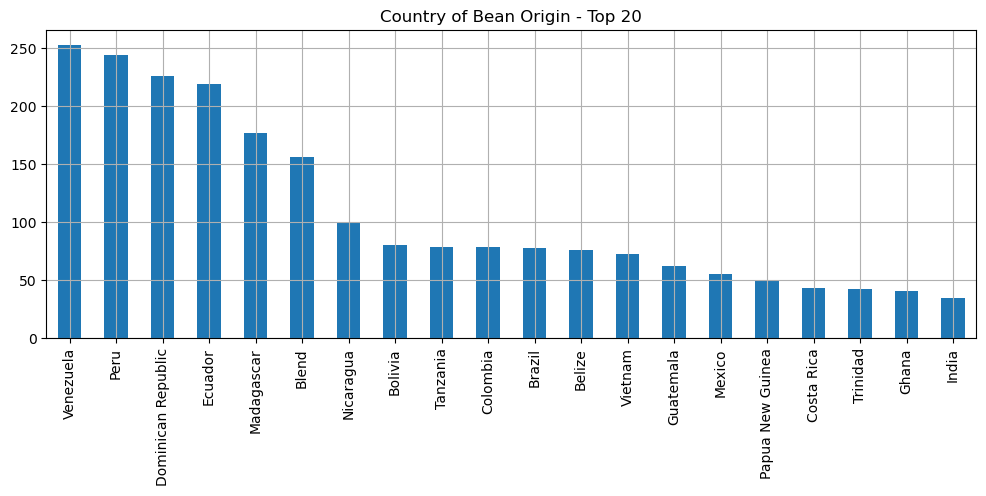

In [24]:
#TOP 20 countries who produce Cacao bean 
top20_country_bean = df['Country of Bean Origin'].value_counts()[0:20]
plt.figure(figsize=(12,4))
top20_country_bean.plot(kind='bar')
plt.title('Country of Bean Origin - Top 20')
plt.grid()
plt.show()
#The country produce the most cacao bean is Venezuela

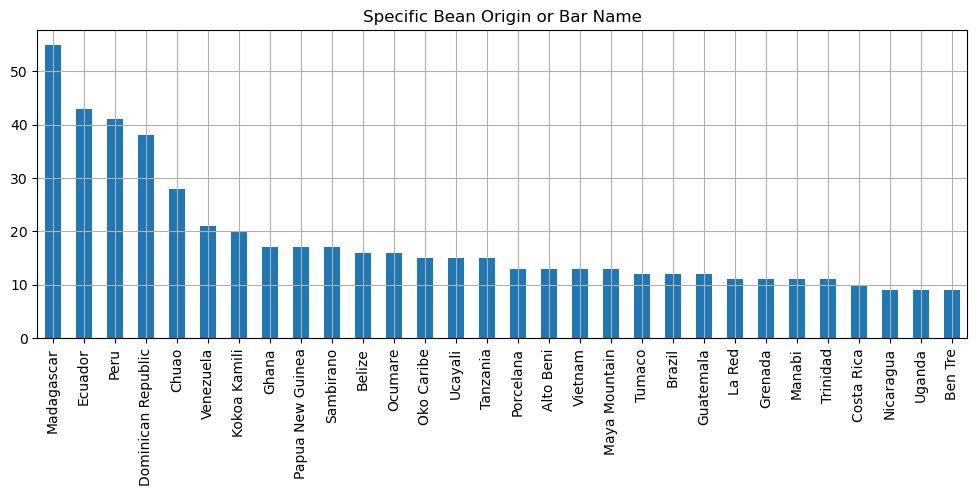

In [25]:
#TOP 30 Specific Bean Origin or Bar Name
top30_Barname = df['Specific Bean Origin or Bar Name'].value_counts()[0:30]
plt.figure(figsize=(12,4))
top30_Barname.plot(kind='bar')
plt.title('Specific Bean Origin or Bar Name')
plt.grid()
plt.show()

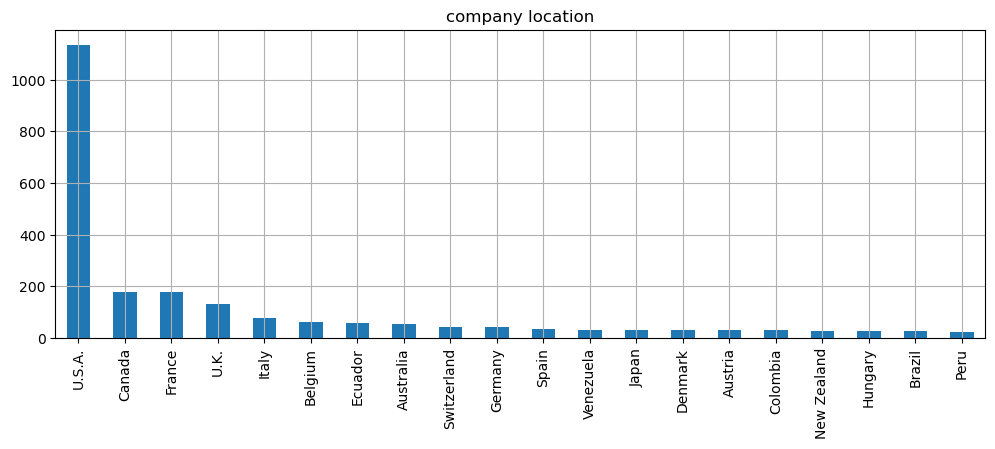

In [26]:
#Top 20 coutries have companies produce chocolate
company = df['Company Location'].value_counts()[0:20]
plt.figure(figsize=(12,4))
company.plot(kind='bar')
plt.title('company location')
plt.grid()
plt.show()

In [27]:
#installation
import geopy

In [28]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Create a world map to show Company Location 
import folium
from folium.plugins import MarkerCluster


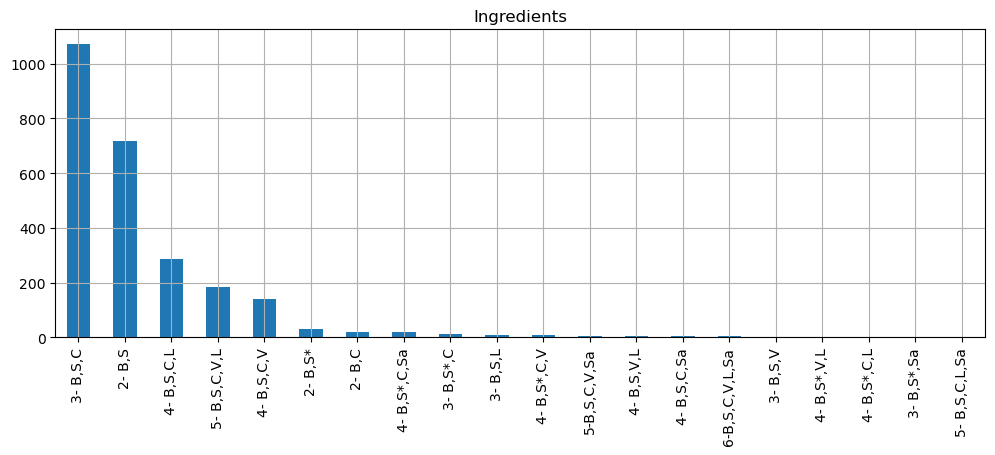

In [30]:
# Categories of ingredients
Ingredients = df['Ingredients'].value_counts()
plt.figure(figsize=(12,4))
Ingredients.plot(kind='bar')
plt.title('Ingredients')
plt.grid()
plt.show()

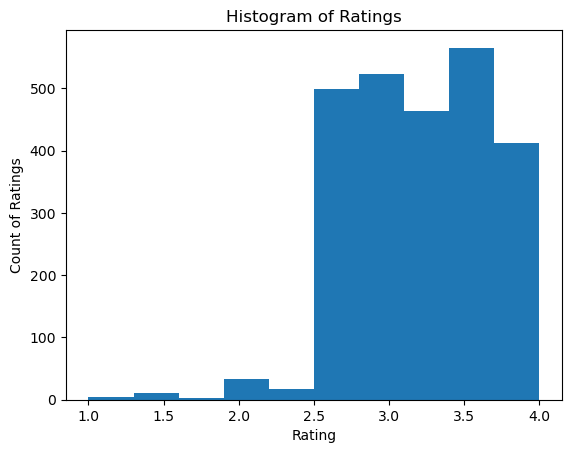

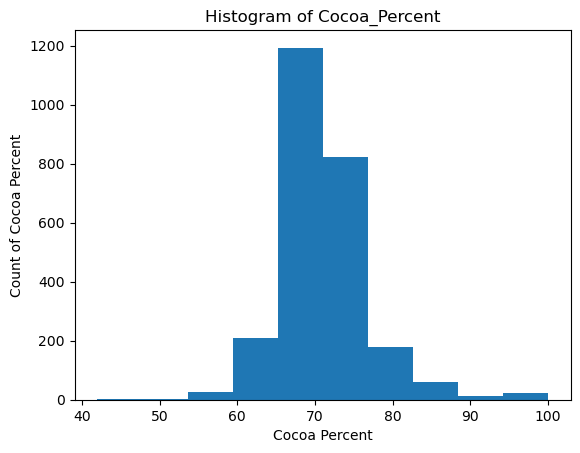

In [31]:
#Count of rating and count of cacao percentage
df['Rating'].plot(kind = 'hist')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.show()

df['Cocoa Percent'].plot(kind = 'hist')
plt.title('Histogram of Cocoa_Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Count of Cocoa Percent')
plt.show()
#We can tell that the majortiy of ratings fall between 3.0 and 3.5, 
#while the majority of chocolate bars had a cocao percentage of 65 to 75.

<Figure size 1200x400 with 0 Axes>

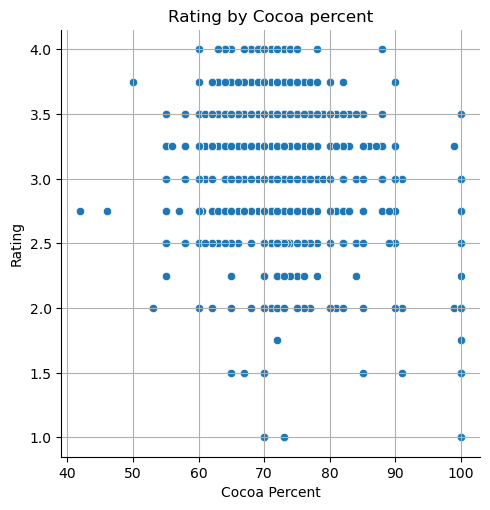

In [32]:
#Rating by Cocoa percent
plt.figure(figsize=(12,4))
sns.relplot(data = df, x='Cocoa Percent', y='Rating')
plt.title('Rating by Cocoa percent')
plt.grid()
plt.show()
#The high rating belongs 62-85 percent cocoa (3.5-4)

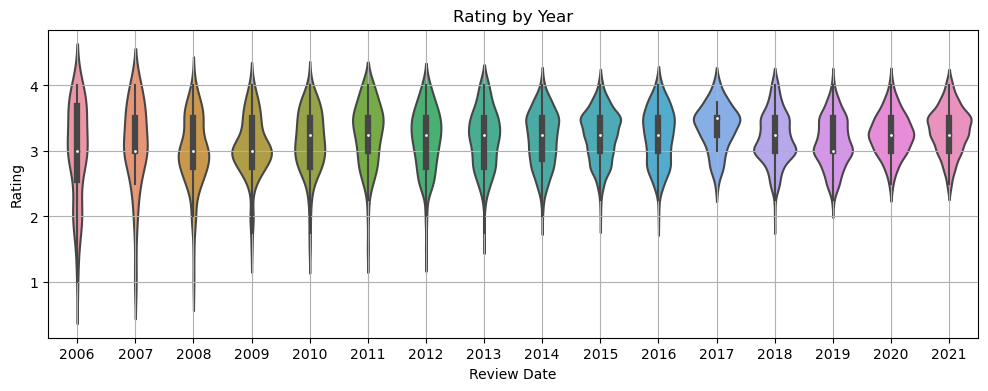

In [33]:
#Rating by year
plt.figure(figsize=(12,4))
sns.violinplot(data = df, x='Review Date', y='Rating')
plt.title('Rating by Year')
plt.grid()
plt.show()

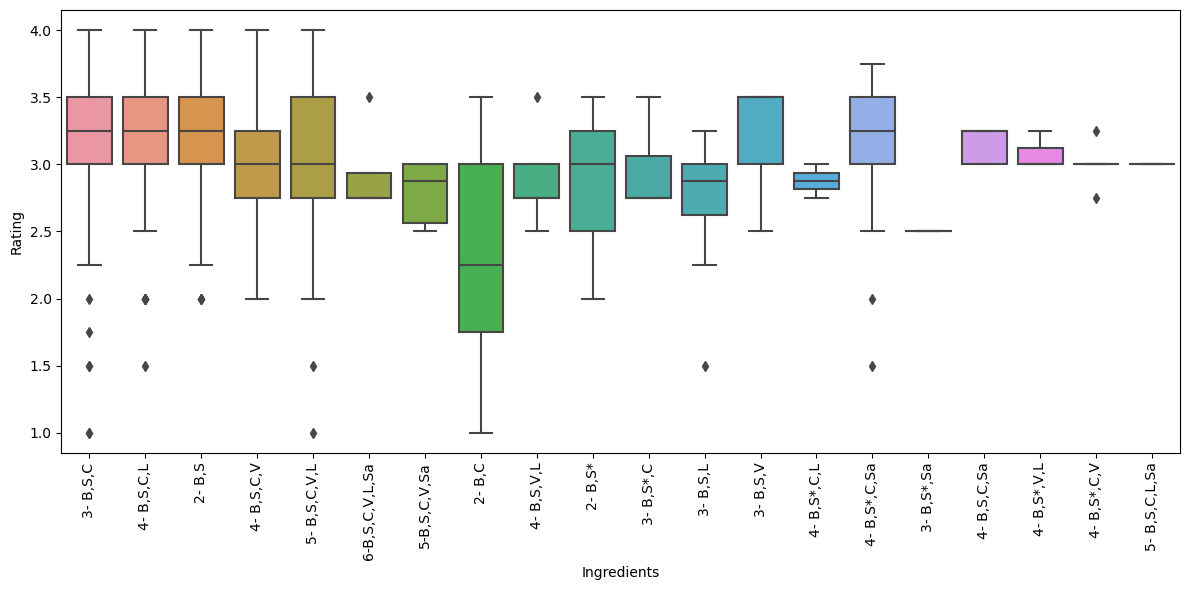

In [36]:
#Rating base on ingredients
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(data=df, y='Rating', x='Ingredients',ax=ax)
plt.xticks(rotation = 90)
fig.tight_layout()

In [37]:
list(df['Company (Manufacturer)'].value_counts()[:10].index)

['Soma',
 'Fresco',
 'Arete',
 'Bonnat',
 'A. Morin',
 'Dandelion',
 'Pralus',
 'Domori',
 'Valrhona',
 'Guittard']

In [38]:
fig, ax = plt.subplots(figsize=[12,6])
sns.boxplot(data=df, y='Rating', x='list(df['Company (Manufacturer)'].value_counts()[:10].index)
' ,ax=ax)
plt.xticks(rotation = 90)
fig.tight_layout()

SyntaxError: invalid syntax (2115604486.py, line 2)

In [ ]:
sns.relplot(x="Review Date", y="Rating", size="Cocoa Percent", sizes=(15, 200), data=df);

In [ ]:
gplot(df,aes(x='Cocoa Percent', y='Rating)) +geom_point(aes(colour=factor('company location')))+theme_minimal()  +theme( legend.position="bottom",legend.key.width=unit(0.2,"cm"),legend.key.height=unit(0.2,"cm") +
  xlab("cocoa Percent(%) ") + ylab(" Rating") + 
  ggtitle("Scatter plot of cocao Percent vs Chocolate Bar Rating")

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

In [ ]:
#WORDCLOUD
! pip install wordcloud

In [ ]:
#WORDCLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
from PIL import Image
import requests
comment_words = '' 
stopwords = set(STOPWORDS)
for val in df['Most Memorable Characteristics']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
comment_words

In [ ]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/g/v/W/X/v/q/mug-md.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 2).generate(comment_words)
plt.figure(figsize = (6, 6), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Feature Generation
In this section i create 2 new feature from existed columns: Chocolate type from "Cocoa percent" and Continents of Bean countries base on "company location"

In [ ]:
#1.classify the chocolates types into Dark, Normal and White chocolates (include EDA)

In [ ]:
df['Chocolate Type'] = df['Cocoa Percent'].apply(lambda x: 'dark' if x>=70 else 'normal' if x < 70 and x > 50 else 'white')

In [ ]:
df['Chocolate Type'].value_counts()

In [ ]:
#EDA for new feature
sns.relplot(x="Review Date", y="Rating", hue="Chocolate Type", kind="line", data=df);
#Here we can see, the liking for dark chocolates have increased over the years an for normal chocolate it stil increased and people dont like the white chocolate.

In [ ]:
df

# OPTION 1: Create continents by import new dataset include country and continents
#Clasify the country of bean in continents by:
#Find another dataset about countries and continents
#Do left join with dataset df

In [ ]:
continents = pd.read_csv(r'C:\Users\James\Documents\CODE DATA ANALYSIS\FINAL PROJECT\countryContinent.csv',encoding="ISO-8859-1")
continents

In [ ]:
#Drop all others columns just keep 2 columns country and continents
#Then change the name of column to have a match with df
continents=continents[['country', 'continent']]
continents

In [ ]:
#DATA CLEANING FOR CONTINENTS
continents.isna().sum()

In [ ]:
continents[continents['continent'].isna()]

In [ ]:
#8	Antarctica	eu
#30	Bouvet Island	eu
#32	British Indian Ocean Territory	asia
#46	Christmas Island	asia
#47	Cocos (Keeling) Islands	asia
#78	French Southern Territories	asia
#96	Heard Island and McDonald Islands	asia
#206	South Georgia and the South Sandwich Islands	america
#236	United States Minor Outlying Islands	americas

In [ ]:
continents.at[8, 'continent'] = 'Europe'
continents.at[30, 'continent'] = 'Europe'
continents.at[206, 'continent'] = 'Americas'
continents.at[236, 'continent'] = 'Americas'


In [ ]:
continents['continent']=continents['continent'].replace(np.nan,'Asia')

In [ ]:
continents['continent'].unique()

In [ ]:
continents.isna().sum()

# Option 2: create continents

In [ ]:
df['Company Location'].unique()

In [52]:
Asia = ['Japan', 'Vietnam', 'Israel', 'South Korea', 'Singapore', 'India', 'Philippines', 'Russia']
North_america = ['U.S.A.', 'Canada', 'Martinique', 'Niacragua', 'Guatemala', 'St. Lucia', 'Puerto Rico', 'Mexico', 'Costa Rica', 'Honduras', 'Nicaragua', 'Domincan Republic']
South_america = ['Ecuador', 'Eucador', 'Colombia', 'Suriname', 'Bolivia', 'Venezuela', 'Chile', 'Peru', 'Brazil', 'Argentina', 'Lithuania']
Europe = ['France', 'Denmark', 'Scotland', 'Wales', 'Czech Republic', 'Finland', 'Ireland', 'Portugal', 'Netherlands', 'Poland', 'Amsterdam', 'Sweden', 'U.K.', 'Italy', 'Belgium', 'Switzerland', 'Germany', 'Austria', 'Spain', 'Hungary']
Oceania = ['Australia', 'New Zealand', 'Fiji']
Africa = ['Madagascar', 'Sao Tome', 'South Africa', 'Ghana']

In [53]:
def continents(x):
    if x in Asia:
        return 'Asia'
    if x in Africa:
        return 'Africa'
    if x in North_america:
        return 'North america'
    if x in South_america:
        return 'South america'
    if x in Europe:
        return 'Europe'
    if x in Oceania:
        return 'Oceania'
    return 'Europe'

In [54]:
df['Continent'] = df['Company Location'].apply(continents)
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Bean,Cocoa_butter,Lecithin,Sugar,Beet_Sugar,Salt,Rating2,Continent
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,1,1,0,1,1,0,2.0,North america
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,1,1,0,1,1,0,3.0,North america
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,1,1,0,1,1,0,3.0,North america
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,1,1,0,1,1,0,2.0,North america
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,0,1,1,0,2.0,North america
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,1,1,0,1,1,1,1.0,Europe
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,1,1,0,1,1,0,3.0,Europe
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,1,1,0,1,1,0,2.0,Europe
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1,1,0,1,1,0,2.0,Europe


In [55]:
df.to_csv(r'C:\Users\James\Documents\CODE DATA ANALYSIS\FINAL PROJECT\choco_continents.csv')

In [ ]:
# drop REF because it is not useful
df.drop('REF',axis=1, inplace=True)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
df.groupby(['Continent'])['Country of Bean Origin'].count().plot.pie( autopct="%.1f%%", pctdistance=0.7, cmap='GnBu')
plt.title('Repartition of cocoa bean continents')

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

# Encoding columns: ingredients, continents and chocolate type.

In [56]:
#Encoding ingredients
#Catoregies of ingredients:
Bean=['B']
Cocoa_butter=['C']
Lecithin=['L']
Sugar=['S']
Beet_Sugar=['S*']
Vanilla=['V']
Salt=['Sa']
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Bean,Cocoa_butter,Lecithin,Sugar,Beet_Sugar,Salt,Rating2,Continent
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,1,1,0,1,1,0,2.0,North america
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,1,1,0,1,1,0,3.0,North america
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,1,1,0,1,1,0,3.0,North america
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,1,1,0,1,1,0,2.0,North america
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,0,1,1,0,2.0,North america
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,1,1,0,1,1,1,1.0,Europe
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,1,1,0,1,1,0,3.0,Europe
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,1,1,0,1,1,0,2.0,Europe
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1,1,0,1,1,0,2.0,Europe


In [57]:
#Catoregies of ingredients:
df['Bean'] = df.Ingredients.str.contains(Bean[0]).astype(int)
df['Cocoa_butter'] = df.Ingredients.str.contains(Cocoa_butter[0]).astype(int)
df['Lecithin'] = df.Ingredients.str.contains(Lecithin[0]).astype(int)
df['Sugar'] = df.Ingredients.str.contains(Sugar[0]).astype(int)
df['Beet_Sugar'] = df.Ingredients.str.contains(Beet_Sugar[0]).astype(int)
df['Salt'] = df.Ingredients.str.contains(Salt[0]).astype(int)
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Bean,Cocoa_butter,Lecithin,Sugar,Beet_Sugar,Salt,Rating2,Continent
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,1,1,0,1,1,0,2.0,North america
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,1,1,0,1,1,0,3.0,North america
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,1,1,0,1,1,0,3.0,North america
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,1,1,0,1,1,0,2.0,North america
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,0,1,1,0,2.0,North america
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,1,1,0,1,1,1,1.0,Europe
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,1,1,0,1,1,0,3.0,Europe
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,1,1,0,1,1,0,2.0,Europe
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1,1,0,1,1,0,2.0,Europe


In [ ]:
#Encoding Chocolate type
df = pd.get_dummies(data=df, columns=['Chocolate Type'])

In [59]:
#Encoding Continent
df = pd.get_dummies(data=df, columns=['Continent'])
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,...,Sugar,Beet_Sugar,Salt,Rating2,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North america,Continent_Oceania,Continent_South america
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,...,1,1,0,2.0,0,0,0,1,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,...,1,1,0,3.0,0,0,0,1,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,...,1,1,0,3.0,0,0,0,1,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,...,1,1,0,2.0,0,0,0,1,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,...,1,1,0,2.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,...,1,1,1,1.0,0,0,1,0,0,0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,...,1,1,0,3.0,0,0,1,0,0,0
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,...,1,1,0,2.0,0,0,1,0,0,0
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,...,1,1,0,2.0,0,0,1,0,0,0


In [46]:
#Prepare Rating with round funtion
df['Rating'].unique()

array([3.25, 3.5 , 3.75, 3.  , 2.75, 4.  , 2.5 , 1.75, 2.25, 1.5 , 2.  ,
       1.  ])

In [47]:
df['Rating'].value_counts()

3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
2.50    166
4.00    112
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
Name: Rating, dtype: int64

In [48]:
#Encoding Rating
df.loc[df["Rating"]<=2.5, "Rating2"]=0

In [49]:
df.loc[df["Rating"]>2.5, "Rating2"]=df["Rating"]

In [50]:
df['Rating2'].value_counts()

3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
0.00    233
4.00    112
Name: Rating2, dtype: int64

In [51]:
df['Rating2']=df['Rating2'].replace({2.75:1, 3.00:2, 3.25:2, 3.50:3, 3.75:3, 4.00:4})
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Bean,Cocoa_butter,Lecithin,Sugar,Beet_Sugar,Salt,Rating2
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,1,1,0,1,1,0,2.0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,1,1,0,1,1,0,3.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,1,1,0,1,1,0,3.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,1,1,0,1,1,0,2.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,0,1,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,1,1,0,1,1,1,1.0
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,1,1,0,1,1,0,3.0
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00,1,1,0,1,1,0,2.0
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1,1,0,1,1,0,2.0


# MACHINE LEARNING

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

# SUPERVISED MACHINE LEARNING

In [39]:
# IN THIS TASK, I CREATE A NEW DATAFRAME (DATA) THAT IS NEEDED FOR MACHINE LEARNING 
data = df.filter(['Review Date','Cocoa Percent','Rating2','Bean','Cocoa_butter','Lecithin','Sugar','Beet_Sugar','Salt','Chocolate Type_dark','Chocolate Type_normal','Chocolate Type_white','Continent_Africa','Continent_Asia','Continent_Europe','Continent_North america','Continent_South america','Continent_Oceania'])
data

,Review Date,Cocoa Percent
0,2019,76.0
1,2019,76.0
2,2019,76.0
3,2021,68.0
4,2021,72.0
...,...,...
2525,2014,80.0
2526,2017,75.0
2527,2018,75.0
2528,2018,70.0


In [ ]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [ ]:
data.Rating2.value_counts()

In [ ]:
x = data.drop(['Rating2'], axis=1)
y = data['Rating2']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# k-Nearest-Neighbors

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

# LinerSVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(x_train, y_train)